## Marciniak, Duncan, and Hu (2002): _Mechanics of Sheet Metal Forming_.
### Exercise 2.1.

A square element 8 × 8 mm in an undeformed sheet of 0.8 mm thickness becomes
a rectangle, 6.5 × 9.4 mm after forming. Assume that the stress strain law is:

$\overline\sigma = 600 (0.008 + \overline\varepsilon)^{0.22}$ (MPa)

and that the stress normal to the sheet is zero. Determine:

(a) the final membrane stresses;

(b) the final thickness;

(c) the principal strains.

Sketch these in the stress or strain space.

Also determine:

(d) the stress and strain ratios (assumed constant) and the hydrostatic stress and the
deviatoric stresses at the end of the process, and

(e) the plastic work of deformation in the element.

### Solutions

In [1]:
t0 = 0.8
l0 = 8
w0 = 8
l = 9.4
w = 6.5

#### Strains

$$ \varepsilon_1 = \ln\frac{l}{l_0} \qquad , \qquad \varepsilon_2 = \ln\frac{w}{w_0} \qquad , \qquad \varepsilon_3 = -(\varepsilon_1+\varepsilon_2) $$

$$\beta = \frac{\varepsilon_2}{\varepsilon_1} $$

$$ \overline\varepsilon = \varepsilon_1 \frac{2}{\sqrt{3}} \sqrt{1+\beta+\beta^2} $$

e1 = 0.161, e2 = -0.208, e3 = 0.046
beta = -1.29
e_eff = 0.218


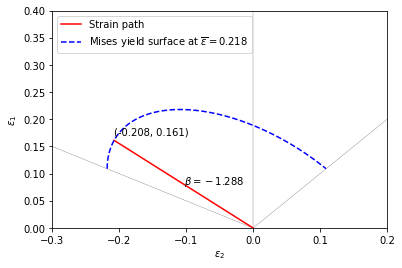

In [2]:
import math
e1 = math.log(l/l0)
e2 = math.log(w/w0)
e3 = -(e1+e2)
beta = e2/e1
e_eff = e1*2/math.sqrt(3)*math.sqrt(1+beta+beta**2)
print("e1 = %.3f, e2 = %.3f, e3 = %.3f" % (e1, e2, e3))
print("beta = %.2f" % beta)
print("e_eff = %.3f" % e_eff)

import marciniak_functions as f
f.plot_strains(e1, e2)

#### Stresses

$$ \overline\sigma = 600 (0.008 + \overline\varepsilon)^{0.22} $$

$$ \alpha = \frac{2\beta+1}{2+\beta} $$ 

$$ \sigma_1 = \frac{\overline\sigma}{\sqrt{1-\alpha+\alpha^2}} \qquad , \qquad \sigma_2=\alpha\sigma_1 \qquad , \qquad \sigma_3 = 0 $$


s_eff = 432.6 MPa
alpha = -2.21
s1 = 152.0 MPa, s2 = -336.0 MPa, s3 = 0.0 MPa


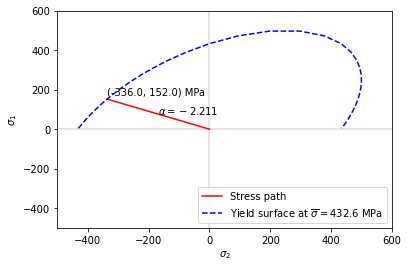

In [3]:
s_eff = 600*(0.008 + e_eff)**0.22
alpha = (2*beta+1)/(2+beta)
s1 = s_eff/math.sqrt(1-alpha+alpha**2)
s2 = alpha*s1
s3 = 0

print("s_eff = %.1f MPa" % s_eff)
print("alpha = %.2f" % alpha)
print("s1 = %.1f MPa, s2 = %.1f MPa, s3 = %.1f MPa" % (s1, s2, s3))
f.plot_stresses(s1, s2)

#### Final thickness

$$ t = t_0 \exp(\varepsilon_3) $$

In [4]:
t = t0*math.exp(e3)
print("t = %.3f mm" % t)

t = 0.838 mm


#### Hydrostatic stress and deviatoric stresses

$$ \sigma_m = \frac{\sigma_1+\sigma_2+\sigma_3}{3}  $$

$$ \sigma'_i = \sigma_i - \sigma_m \qquad , \qquad i = {1, 2, 3} $$ 

In [5]:
s_m = (s1+s2+s3)/3
ds1 = s1 - s_m
ds2 = s2 - s_m
ds3 = s3 - s_m
print("s_m = %.1f MPa, ds1 = %.1f MPa, ds2 = %.1f MPa, ds3 = %.1f MPa" % (s_m, ds1, ds2, ds3))

s_m = -61.3 MPa, ds1 = 213.3 MPa, ds2 = -274.7 MPa, ds3 = 61.3 MPa


#### Plastic work

Density of plastic work:

$$ pw = \int_0^{\overline\varepsilon} \overline\sigma d\overline\varepsilon =
600 \int_0^{\overline\varepsilon} (0.008 + \overline\varepsilon)^{0.22} d\overline\varepsilon \cdot \frac{1}{1000} = 
600 \left[ \frac{(0.008 + \overline\varepsilon)^{1.22}}{1.22} \right]_0^\overline\varepsilon \cdot \frac{1}{1000} $$

where the units are MPa/1000 = N/mm$^2$/1000 = J/mm$^3$.

Plastic work (in J):
$$ PW = pw \cdot V = pw \cdot 0.8 \cdot 8 \cdot 8  $$
where $V$ is the material volumen in mm$^3$.

In [6]:
pw = 600/1.22*((0.008+e_eff)**1.22 - 0.008**1.22)
pw = pw/1000 # in J/mm3
V = l0*w0*t0
PW = pw*V
print("pw = %.4f J/mm3, V= %.1f mm3, PW = %.2f J" % (pw, V, PW))

pw = 0.0788 J/mm3, V= 51.2 mm3, PW = 4.03 J
